# Computational Modeling of Drug Delivery Systems

**Author:** Débora Ferreira Deotti

**Project:** Final Undergraduate Thesis - Chemical Engineering, UNICAMP

## Motivation

This project was motivated by the historical gap in scientific research, which for centuries has excluded or neglected the specificities of women's health. This work seeks to apply engineering tools—specifically computational modeling—to deepen the understanding of contraceptive methods, contributing to fill this gap and promote better health outcomes for women.

## Notebook Objective

This notebook presents the Python implementation of the mathematical models developed to simulate the release of the drug ethinylestradiol (EE) from three different delivery systems: the transdermal patch, the vaginal ring, and the combined oral contraceptive (COC).

## 1. Transdermal Patch Simulation

The drug diffusion in this matrix was modeled using Fick's Second Law (a Partial Differential Equation - PDE). To solve the equation numerically, the **Crank-Nicolson method** was implemented. This is an implicit and unconditionally stable approach, ideal for this type of diffusion problem, as it overcomes the computational limitations of the standard finite difference method.

## Adesivo transdérmico

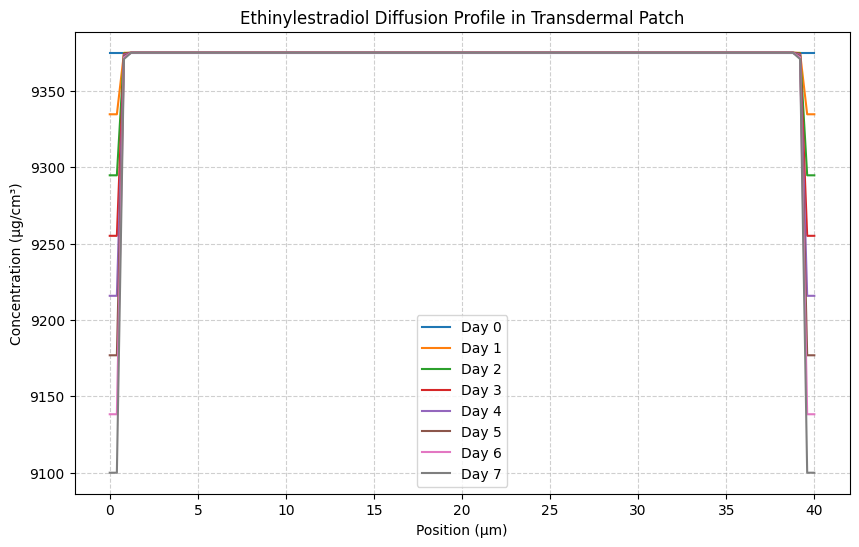

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# --- Parameters for the Transdermal Patch ---
L1 = 0.004  # Matrix thickness (cm)
D1 = 2.88e-13  # Diffusion coefficient (cm^2/h), empirically adjusted for the model
C10 = 9375  # Initial drug concentration (ug/cm^3)
Km = 1.0  # Matrix-skin partition coefficient
V1 = 0.08  # Total patch volume (cm³)

# --- Discretization ---
Nx1 = 100  # Number of spatial points
T1 = 168  # Total simulation time (h, for 7 days)
dx1 = L1 / Nx1  # Spatial step
dt = 0.1  # Time step (h)

# --- Initial Conditions ---
C1 = np.zeros((Nx1, int(T1 / dt) + 1))
C1[:, 0] = C10
total_drug_available_patch = C10 * V1

# --- Crank-Nicolson Method Setup ---
alpha1 = D1 * dt / (2 * dx1**2)
A1 = diags([-alpha1, 1 + 2 * alpha1, -alpha1], [-1, 0, 1], shape=(Nx1 - 2, Nx1 - 2)).tocsc()
B1 = diags([alpha1, 1 - 2 * alpha1, alpha1], [-1, 0, 1], shape=(Nx1 - 2, Nx1 - 2))

# --- Simulation Loop ---
total_released_patch = 0
for n in range(0, int(T1 / dt)):
    # Solve the linear system for the next time step
    b1 = B1 @ C1[1:-1, n]
    C1[1:-1, n + 1] = spsolve(A1, b1)

    # Boundary Conditions
    C1[0, n + 1] = C1[1, n + 1]  # Zero flux at x=0
    C1[-1, n + 1] = Km * C1[-2, n + 1] # Partition at x=L1

# --- Plotting the Diffusion Profile ---
time_points_patch = [int(24 / dt * day) for day in range(0, 8)]
space_um_patch = np.linspace(0, L1 * 1e4, Nx1) # cm to µm for plotting

plt.figure(figsize=(10, 6))
for n in time_points_patch:
    plt.plot(space_um_patch, C1[:, n], label=f'Day {int(n * dt / 24)}')

plt.title('Ethinylestradiol Diffusion Profile in Transdermal Patch')
plt.xlabel('Position (µm)')
plt.ylabel('Concentration (µg/cm³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 1.1. Zoomed-in View: Patch Boundary

The following plot zooms in on the boundary layer (39-40 µm) where the drug is released from the patch. This detailed view clearly shows the concentration gradient changing daily, which drives the diffusion process.


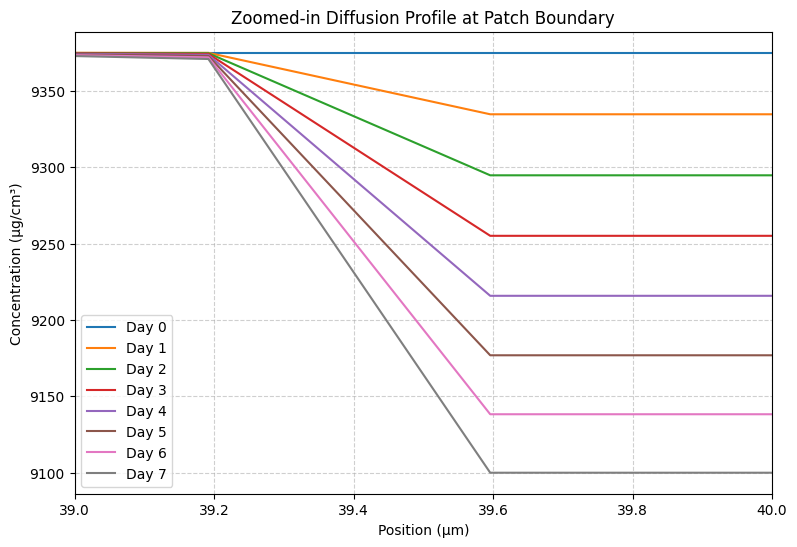

In [11]:
# --- Plotting the zoomed-in profile ---
plt.figure(figsize=(9, 6))
for n in time_points_patch:
    plt.plot(space_um_patch, C1[:, n], label=f'Day {int(n * dt / 24)}')

plt.title('Zoomed-in Diffusion Profile at Patch Boundary')
plt.xlabel('Position (µm)')
plt.xlim(39, 40)
plt.ylabel('Concentration (µg/cm³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2. Vaginal Ring Simulation

Similarly to the patch, the vaginal ring's simulation also uses the Crank-Nicolson method to solve the PDE governing the diffusion process. The input parameters, such as thickness and initial concentration, have been adjusted to reflect this specific delivery system.

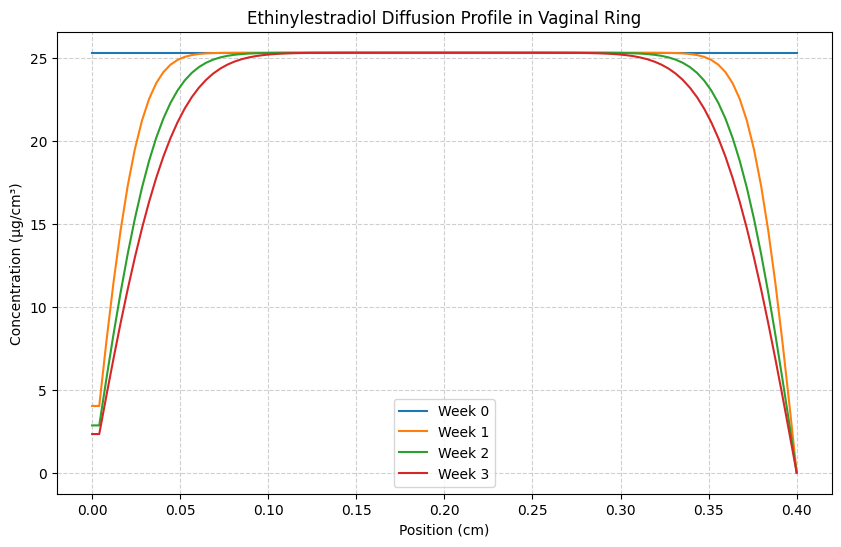

In [13]:
# --- Parameters for the Vaginal Ring ---
L2 = 0.4  # Matrix thickness (cm)
D2 = 0.00396/5000 * 1.5 # Diffusion coefficient (cm^2/h), empirically adjusted
C20 = 25.33 # Initial drug concentration (ug/cm^3)
V2 = 106.58 # Total ring volume (cm^3)

# --- Discretization ---
Nx2 = 100  # Number of spatial points
T2 = 504  # Total simulation time (h, for 21 days)
dx2 = L2 / Nx2  # Spatial step
dt2 = 0.1 # Time step (h)

# --- Initial Conditions ---
C2 = np.zeros((Nx2, int(T2 / dt2) + 1))
C2[:, 0] = C20
total_drug_available_ring = C20 * V2

# --- Crank-Nicolson Method Setup ---
alpha2 = D2 * dt2 / (2 * dx2**2)
A2 = diags([-alpha2, 1 + 2 * alpha2, -alpha2], [-1, 0, 1], shape=(Nx2 - 2, Nx2 - 2)).tocsc()
B2 = diags([alpha2, 1 - 2 * alpha2, alpha2], [-1, 0, 1], shape=(Nx2 - 2, Nx2 - 2))

# --- Simulation Loop ---
for n in range(0, int(T2 / dt2)):
    # Solve the linear system
    b2 = B2 @ C2[1:-1, n]
    C2[1:-1, n + 1] = spsolve(A2, b2)

    # Boundary Conditions
    C2[0, n + 1] = C2[1, n + 1] # Zero flux at x=0
    C2[-1, n + 1] = 0 # Perfect sink at x=L2 (rapid absorption by mucosa)

# --- Plotting the Diffusion Profile ---
time_points_ring = [int((7 * 24) / dt2) * week for week in range(4)]
space_cm_ring = np.linspace(0, L2, Nx2)

plt.figure(figsize=(10, 6))
for tp in time_points_ring:
    plt.plot(space_cm_ring, C2[:, tp], label=f'Week {time_points_ring.index(tp)}')

plt.title('Ethinylestradiol Diffusion Profile in Vaginal Ring')
plt.xlabel('Position (cm)')
plt.ylabel('Concentration (µg/cm³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 2.1. Zoomed-in View: Ring Boundary

Here, we zoom in on the outer edge of the ring (0.3-0.4 cm). The "perfect sink" boundary condition at x=0.4 cm is evident, as the concentration drops to zero, representing the rapid absorption of the drug by the skin.


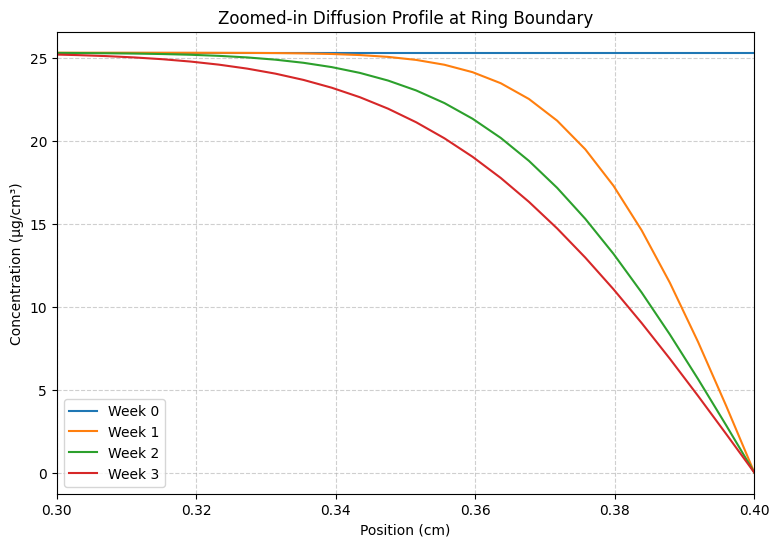

In [14]:
# --- Plotting the zoomed-in profile ---
plt.figure(figsize=(9, 6))
for tp in time_points_ring:
    plt.plot(space_cm_ring, C2[:, tp], label=f'Week {time_points_ring.index(tp)}')

plt.title('Zoomed-in Diffusion Profile at Ring Boundary')
plt.xlabel('Position (cm)')
plt.xlim(0.3, 0.4)
plt.ylabel('Concentration (µg/cm³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3. Combined Oral Contraceptive (COC) Simulation

Unlike the other systems, the release from the pill follows a first-order kinetics model (an Ordinary Differential Equation - ODE), described by the Noyes-Whitney equation. To solve this ODE with high precision, the **4th-order Runge-Kutta (RK4) method** was used.

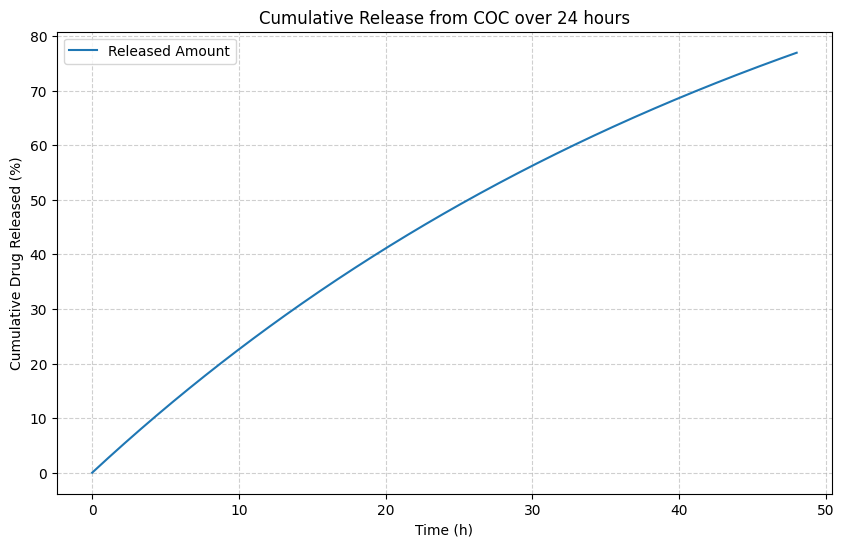

In [16]:
# --- Parameters for the COC ---
Cs = 18.7  # Maximum EE solubility in gastrointestinal fluid (ug/cm^3)
kd = 0.02  # Dissolution constant (1/h)
T3 = 48  # Total simulation time (h)
dt3 = 0.1 # Time step (h)
C_max = 15 # Maximum allowed concentration in the formulation (ug/cm^3)

# --- ODE Function ---
def dCdt(C_current, t):
    return kd * (Cs - C_current)

# --- Initialization ---
t_values = np.arange(0, T3 + dt3, dt3)
C3 = np.zeros(len(t_values))
C3[0] = 0  # Initial concentration is zero

# --- RK4 Method Loop ---
for i in range(1, len(t_values)):
    t = t_values[i-1]
    C_current = C3[i-1]

    k1 = dt3 * dCdt(C_current, t)
    k2 = dt3 * dCdt(C_current + 0.5 * k1, t + 0.5 * dt3)
    k3 = dt3 * dCdt(C_current + 0.5 * k2, t + 0.5 * dt3)
    k4 = dt3 * dCdt(C_current + k3, t + dt3)

    C_new = C_current + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Impose concentration limit
    C3[i] = min(C_new, C_max)

# --- Plotting the Release Profile ---
plt.figure(figsize=(10, 6))
plt.plot(t_values, (C3 / C_max) * 100, label='Released Amount')
plt.xlabel('Time (h)')
plt.ylabel('Cumulative Drug Released (%)')
plt.title('Cumulative Release from COC over 24 hours')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 4. Comparative Analysis and Conclusions

By plotting the release profiles of the three systems together, we can observe distinct behaviors consistent with literature data. This final section calculates the release rate for each system and visualizes them on a single graph to facilitate comparison.


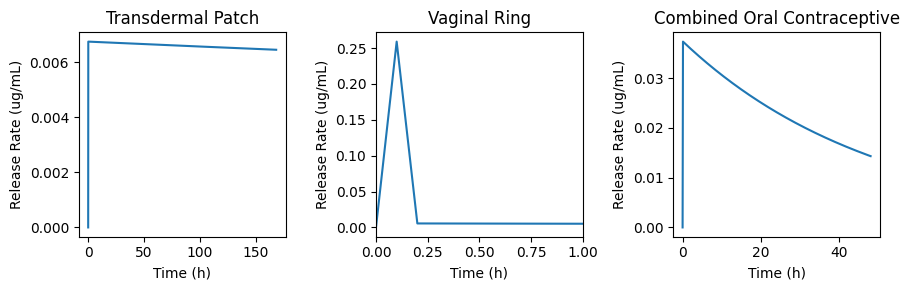

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function to calculate release rate ---
def calculate_release_rate(C, dx=None):
    release_rate = np.zeros(C.shape[1]) if C.ndim == 2 else np.zeros(len(C))
    for n in range(1, C.shape[1] if C.ndim == 2 else len(C)):
        if C.ndim == 2: # Patch and Ring
            # Usar a média da concentração ao longo da matriz para cada ponto temporal
            avg_concentration = np.mean(C[:, n] - C[:, n - 1])
            rate = avg_concentration
        else: # COC
            dC = C[n] - C[n - 1]
            rate = dC
        release_rate[n] = rate
    return np.abs(release_rate)

# --- Calculate rates ---
release_rate_patch = calculate_release_rate(C1, dx1)
release_rate_ring = calculate_release_rate(C2, dx2)
release_rate_pill = calculate_release_rate(C3)

# --- Plot Results ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot results for the Transdermal Patch
axs[0].plot(np.linspace(0, T1, len(release_rate_patch)), release_rate_patch)
axs[0].set_xlabel('Time (h)')
axs[0].set_ylabel('Release Rate (ug/mL)')
axs[0].set_title('Transdermal Patch')

# Plot results for the Vaginal Ring
axs[1].plot(np.linspace(0, T2, len(release_rate_ring)), release_rate_ring)
axs[1].set_xlabel('Time (h)')
axs[1].set_ylabel('Release Rate (ug/mL)')
axs[1].set_title('Vaginal Ring')
axs[1].set_xlim(0, 1)  # Recorte de tempo para a primeira hora

# Plott results for the COC
axs[2].plot(np.linspace(0, T3, len(release_rate_pill)), release_rate_pill)
axs[2].set_xlabel('Time (h)')
axs[2].set_ylabel('Release Rate (ug/mL)')
axs[2].set_title('Combined Oral Contraceptive')


plt.tight_layout()
plt.show()

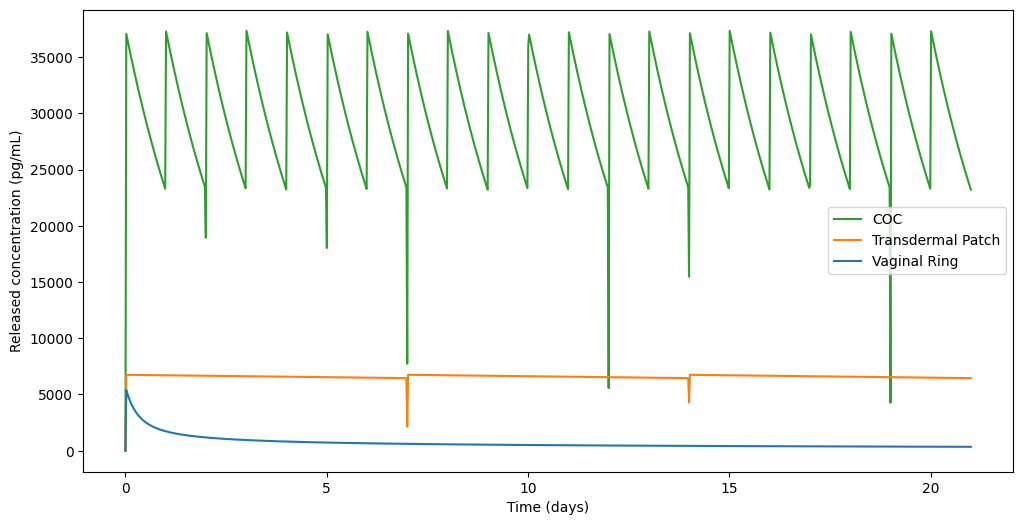

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- Prepare data for comparative plot (simulating refills) ---
dt = 0.1  # Time step (h)
T_total = 21 * 24  # Total time (h)
num_days = 21  # Total days

def stack_curves(data, repeat_interval, total_time, dt):
    num_repeats = int(total_time / repeat_interval)
    stacked_data = np.zeros(int(total_time / dt))
    for i in range(num_repeats):
        start_idx = int(i * repeat_interval / dt)
        end_idx = start_idx + len(data)
        stacked_data[start_idx:end_idx] = data
    return stacked_data

# Stack curves for a 21-day period
release_rate_pill_stacked = stack_curves(release_rate_pill[:int(24/dt)], 24, T_total, dt)
release_rate_patch_stacked = stack_curves(release_rate_patch[:int(168/dt)], 168, T_total, dt)
release_rate_ring_stacked = stack_curves(release_rate_ring[:int(504/dt)], 504, T_total, dt)

# --- Plotting the Comparative Graph ---
# Convert release rates from µg/h to pg/h
release_rate_pill_stacked *= 1e6
release_rate_patch_stacked *= 1e6
release_rate_ring_stacked *= 1e6

num_points = 1000
x_values = np.linspace(0, num_days, num_points)
release_rate_pill_reduced = np.interp(x_values, np.linspace(0, num_days, len(release_rate_pill_stacked)), release_rate_pill_stacked)
release_rate_patch_reduced = np.interp(x_values, np.linspace(0, num_days, len(release_rate_patch_stacked)), release_rate_patch_stacked)
release_rate_ring_reduced = np.interp(x_values, np.linspace(0, num_days, len(release_rate_ring_stacked)), release_rate_ring_stacked)

color_ring = '#1f77b4'
color_patch = '#ff7f0e'
color_pill = '#2ca02c'

plt.figure(figsize=(12, 6))
plt.plot(x_values, release_rate_pill_reduced, label='COC', color=color_pill)
plt.plot(x_values, release_rate_patch_reduced, label='Transdermal Patch', color=color_patch)
plt.plot(x_values, release_rate_ring_reduced, label='Vaginal Ring', color=color_ring)
plt.xlabel('Time (days)')
plt.ylabel('Released concentration (pg/mL)')
plt.legend()
plt.show()